In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html

# Scaling

In [ ]:
!gdown '1-9wfY_d0eMaGImZ3f8dbLp-fx8BWuc1w'

Downloading...
From: https://drive.google.com/uc?id=1-9wfY_d0eMaGImZ3f8dbLp-fx8BWuc1w
To: /content/messi5.jpg
100% 20.5k/20.5k [00:00<00:00, 35.7MB/s]


Adjust the size of an image to enlarge or shrink it:
1. Using absolute dimensions (dsize): specify the target width and height in pixels.
2. Using relative scaling factors (fx, fy). Set values greater than 1 to enlarge the image and less than 1 to shrink it.
3. Specify the interpolation method
  Interpolation Methods:
  1. cv.INTER_NEAREST (Nearest Neighbor Interpolation)
  2. cv.INTER_LINEAR (Bilinear Interpolation)
  3. cv.INTER_AREA (Pixel Area Resampling)
  4. cv.INTER_CUBIC (Bicubic Interpolation)


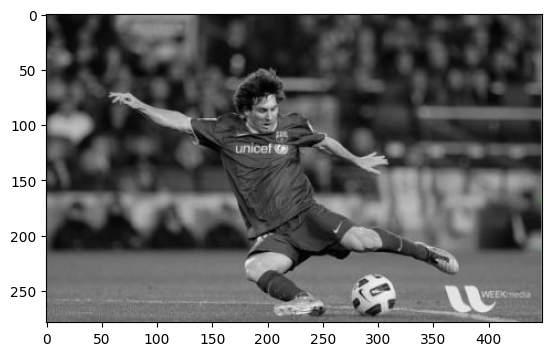

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
messi = cv.imread('messi5.jpg')
assert messi is not None, "file could not be read, check with os.path.exists()"
plt.imshow(messi[:,:,::-1])
plt.show()

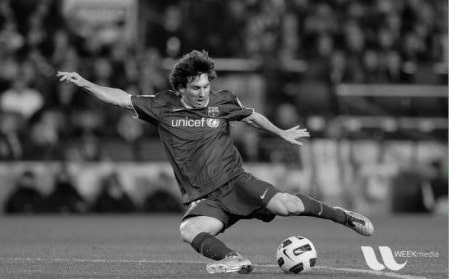

In [ ]:
from google.colab.patches import cv2_imshow  # To display images in Google Colab
cv2_imshow(messi)

### Absolute Size Scaling

In [ ]:
messi.shape

(279, 449, 3)

In [ ]:
height,width=messi.shape[:2]

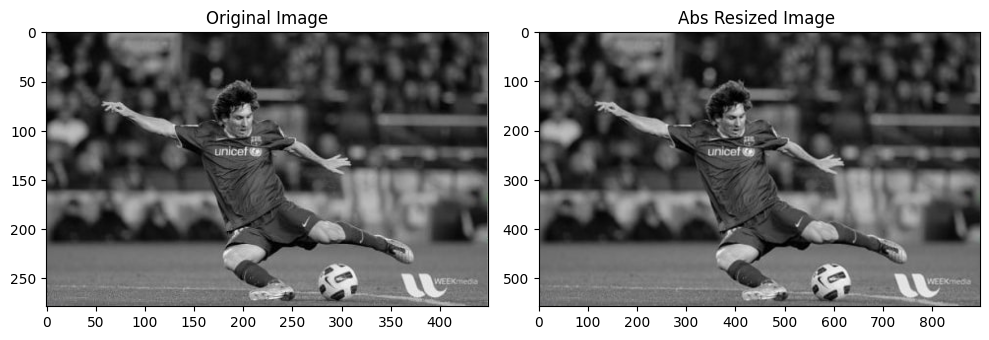

In [ ]:
abs_res = cv.resize(messi,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv.cvtColor(messi, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Abs Resized Image ")
plt.imshow(cv.cvtColor(abs_res, cv.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

### Relative Size Scaling

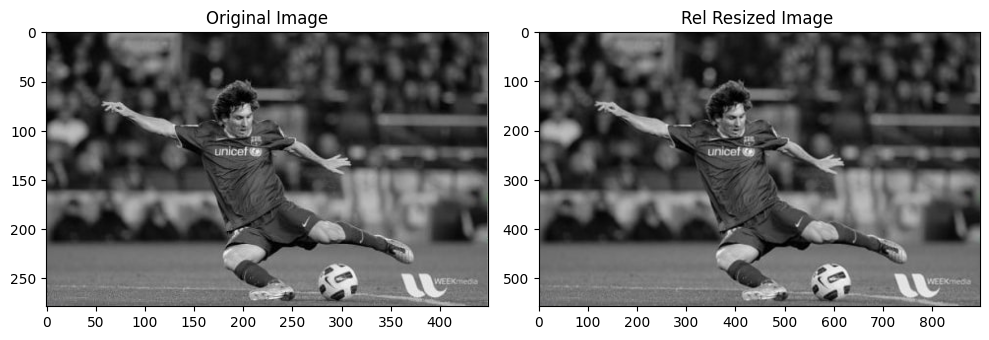

In [ ]:
rel_res = cv.resize(messi,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv.cvtColor(messi, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Rel Resized Image ")
plt.imshow(cv.cvtColor(rel_res, cv.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()

In [ ]:
messi.shape[:2]

(279, 449)

In [ ]:
abs_res.shape[:2]

(558, 898)

In [ ]:
rel_res.shape[:2]

(558, 898)

# Translation
Translation is the shifting of an object's location

$$
M =
\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y
\end{bmatrix}
$$

- 𝑡𝑥： distances the image needs to move along the x-axis
​
- 𝑡𝑦：​the distances the image needs to move along the y-axis


In [ ]:
img = cv.imread('messi5.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"


In [ ]:
img.shape

(279, 449)

In [ ]:
rows,cols = img.shape

In [ ]:
rows

279

In [ ]:
cols

449

 For a shift of (100,50):

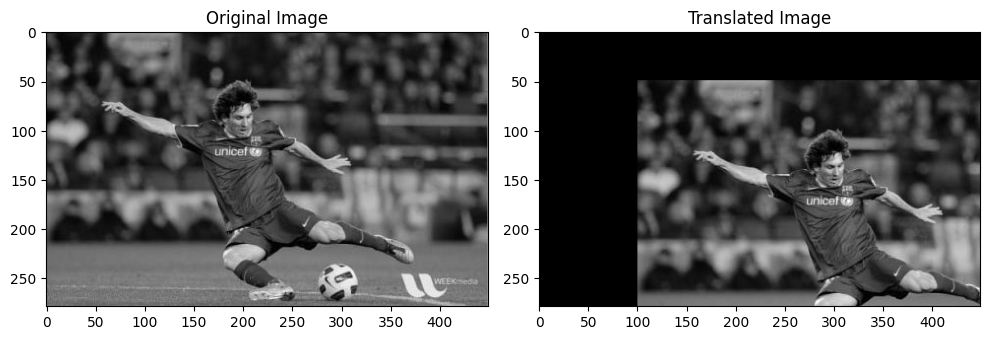

In [ ]:
# 1. Generate matrix
M = np.float32([[1,0,100],[0,1,50]])

# 2. Translation
dst = cv.warpAffine(img,M,(cols,rows)) # size after shifted

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Translated Image")
plt.imshow(dst, cmap='gray')

plt.tight_layout()
plt.show()

# Rotation

$$
M =
\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}
$$
- This handles only rotation and rotates the image around the top-left corner (0,0) by default.
- Without adjusting the matrix, the rotation will cause the image to shift, and the rotation may not behave as intended because the rotation center isn't where we want it to be.

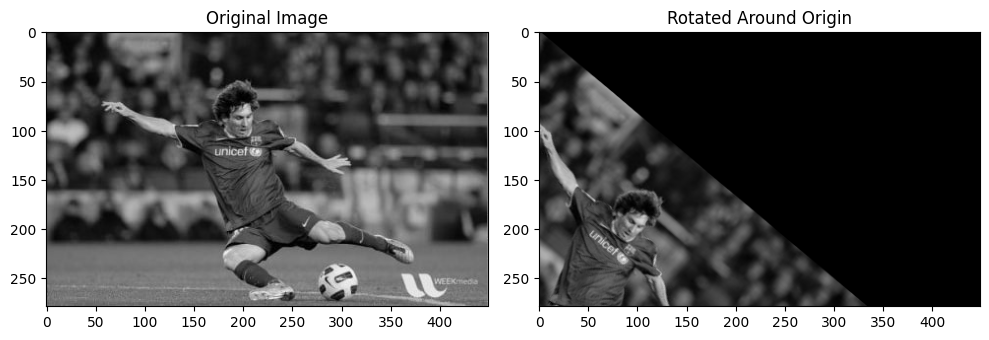

In [ ]:
# Get the width and height of the image
height, width = messi.shape[:2]

# Define the rotation angle (40 degrees counter-clockwise)
theta = np.radians(40)  # Convert degrees to radians

# Construct the rotation matrix, rotating around the origin (0, 0)
M = np.array([
    [np.cos(theta), -np.sin(theta), 0],  # Row 1 of the matrix
    [np.sin(theta), np.cos(theta), 0]   # Row 2 of the matrix
], dtype=np.float32)

# Create a blank image to store the rotated result
rotated_img = cv2.warpAffine(messi, M, (width, height))

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Rotated Around Origin")
plt.imshow(cv.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))

plt.tight_layout()
plt.show()


Thus， OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer.

$$
M =
\begin{bmatrix}
\alpha & \beta & (1-\alpha) \cdot \text{center.x} - \beta \cdot \text{center.y} \\
-\beta & \alpha & \beta \cdot \text{center.x} + (1-\alpha) \cdot \text{center.y}
\end{bmatrix}
$$

<div align="left">
Where:
\( \alpha = \text{scale} \cdot \cos\theta \)，
\( \beta = \text{scale} \cdot \sin\theta \)
</div>

In [ ]:
# 1. Generate the Rotation Matrix
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
# 2. Rotate
rotated_img = cv.warpAffine(img,M,(cols,rows))


In [ ]:
center_x = (cols - 1) / 2.0
center_y = (rows - 1) / 2.0
print(f"Center point: ({center_x}, {center_y})")


Center point: (224.0, 139.0)


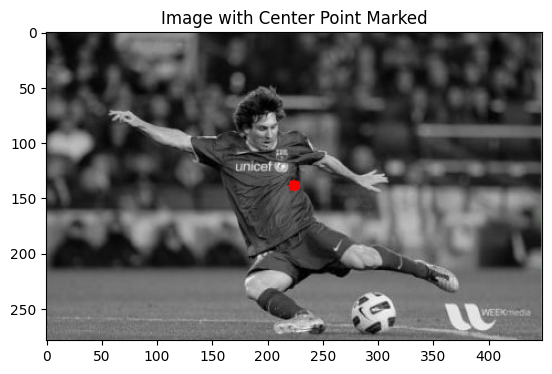

In [ ]:
# Load the image in color mode
point_img = cv.imread('messi5.jpg', cv.IMREAD_COLOR)
assert point_img is not None, "file could not be read, check with os.path.exists()"

# Mark the center point (red dot)
# cv.circle(image, center, radius, color, thickness)
cv.circle(point_img, (int(224.0), int(139.0)), 5, (0, 0, 255), -1)

plt.imshow(cv.cvtColor(point_img, cv.COLOR_BGR2RGB))
plt.title("Image with Center Point Marked")
plt.show()


Rotate the image by 90 degree with respect to center without any scaling.

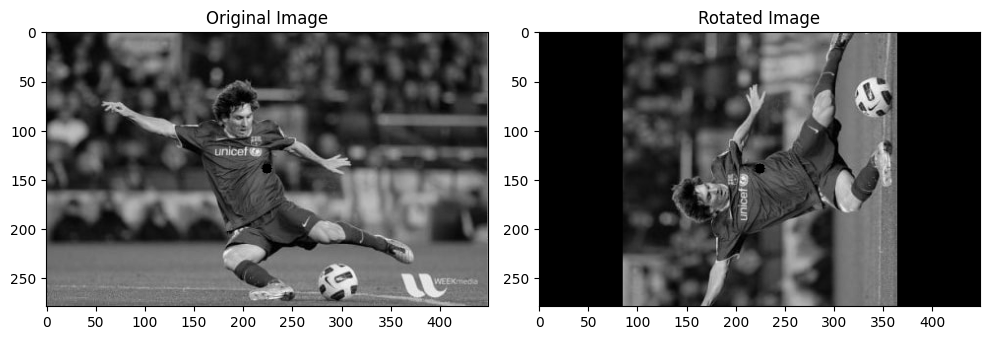

In [ ]:
# 1. Generate the Rotation Matrix
rows,cols = img.shape
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)

# 2. Rotate
rotated_img = cv.warpAffine(img,M,(cols,rows)) # cols,rows:output size

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(rotated_img, cmap='gray')

plt.tight_layout()
plt.show()

# Affine Transformation
- In affine transformation, all parallel lines in the original image will still be parallel in the output image.
- To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image.
- Then cv.getAffineTransform computes the six parameters of the matrix，create a 2x3 matrix which is to be passed to cv.warpAffine.

$$
M =\begin{bmatrix}
a_{00} & a_{01} & b_0 \\
a_{10} & a_{11} & b_1
\end{bmatrix}
$$


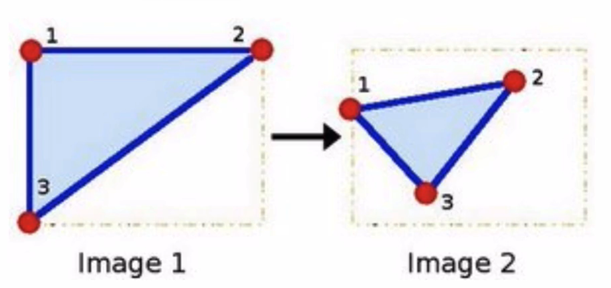




In [ ]:
!gdown '14beb7DI9leDUuxW0ixAvaaPggIXa9uxL'

Downloading...
From: https://drive.google.com/uc?id=14beb7DI9leDUuxW0ixAvaaPggIXa9uxL
To: /content/drawing.png
100% 43.3k/43.3k [00:00<00:00, 71.4MB/s]


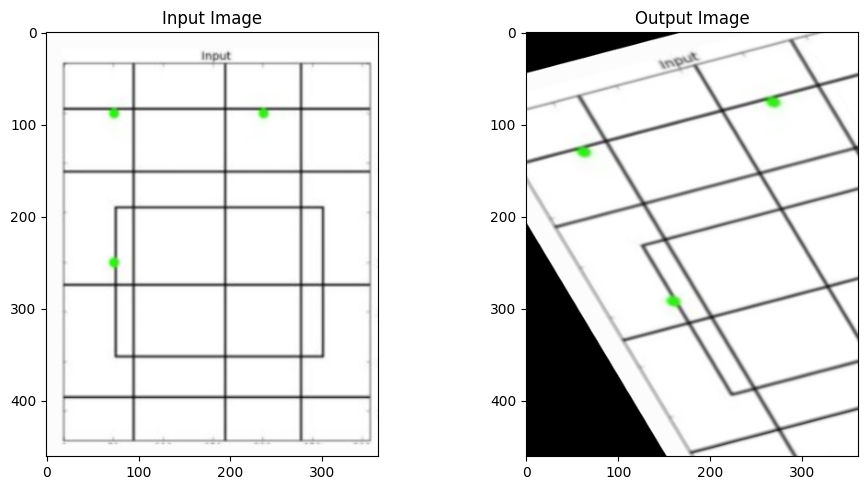

In [ ]:
drawing = cv.imread('drawing.png')

rows, cols = drawing.shape[:2]

# Define input and output points
# pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3]])
pts1 = np.float32([[50, 50], [200, 50], [50, 200]]) # points in the input image
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])# points in the output image.

# 1. Calculate Affine Transformation Matrix
M = cv.getAffineTransform(pts1, pts2)

# 2. Affine Transform
Affine_transformed = cv.warpAffine(drawing, M, (cols, rows)) # output size col and row

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(drawing, cv.COLOR_BGR2RGB))
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(Affine_transformed, cv.COLOR_BGR2RGB))
plt.title('Output Image')

plt.tight_layout()
plt.show()


# Perspective Transformation

- To change the viewpoint of an image, creating the effect of it being captured from a different angle.
- Straight lines will remain straight even after the transformation
- For perspective transformation, we need a 3x3 transformation matrix.
- To find this transformation matrix, we need 4 points on the input image and corresponding points on the output image.

$$
M =
\begin{bmatrix}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12} \\
a_{20} & a_{21} & a_{22}
\end{bmatrix}
$$


In [ ]:
!gdown '1GJhfj7xsD0ROrZQtvPO7zl3Ob2ozgmBN'

Downloading...
From: https://drive.google.com/uc?id=1GJhfj7xsD0ROrZQtvPO7zl3Ob2ozgmBN
To: /content/sudoku.png
100% 392k/392k [00:00<00:00, 110MB/s]


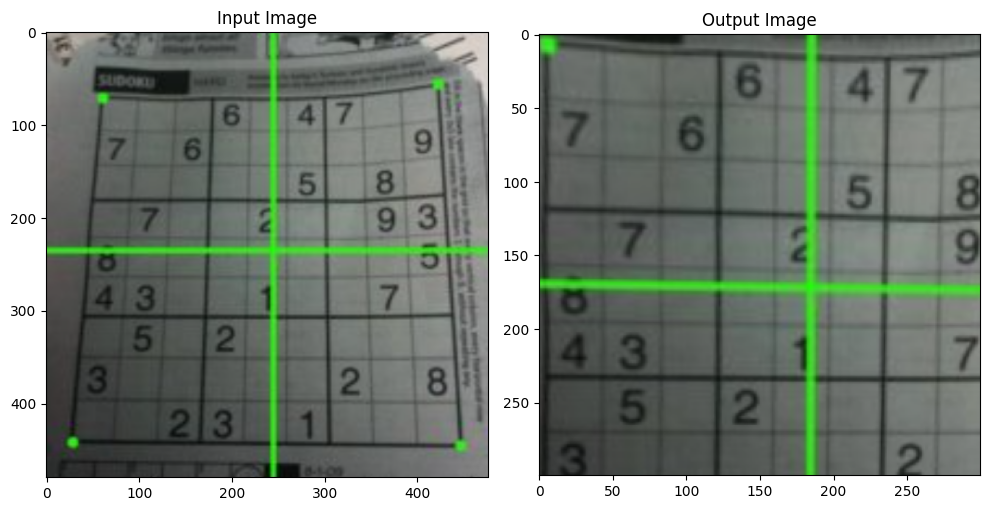

In [ ]:
sudoku= cv.imread('sudoku.png')
rows, cols = sudoku.shape[:2]

# Define the input and outpoints
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

# 1. Generate perspective transform matrix
M = cv.getPerspectiveTransform(pts1,pts2)

# 2. Perspective transform
Perspective_transformed = cv.warpPerspective(sudoku,M,(300,300))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(sudoku, cv.COLOR_BGR2RGB))
plt.title('Input Image')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(Perspective_transformed, cv.COLOR_BGR2RGB))
plt.title('Output Image')

plt.tight_layout()
plt.show()
